In [ ]:
# pip install ForwardStepwiseFeatureSelection

In [11]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ForwardStepwiseFeatureSelection import ForwardStepwiseFeatureSelection

In [2]:
insurance = pd.read_csv('insurance.csv')
label = {key:value for (key,value) in zip(list(insurance['region'].unique()), [i for i in range(0,7)])}
label.update({'male':0, 'female':1, 'yes':0, 'no':1})
insurance.replace(label, inplace=True)

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [4]:
X = insurance.drop('charges', axis=1)
y = insurance[['charges']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [6]:
import xgboost as xgb
clf = xgb.XGBRegressor(use_label_encoder=False, verbosity=0)

In [7]:
from sklearn.model_selection import cross_val_score

Searching the best subset of features with XGBRegressor...
-----------------------------------------------------------Trial 1-----------------------------------------------------------
1/6: ['age']
      Negative Mean Absolute Error: -9313.559, Standard Deviation: 374.5946
 
2/6: ['sex']
      Negative Mean Absolute Error: -9133.8724, Standard Deviation: 360.391
 
3/6: ['bmi']
      Negative Mean Absolute Error: -10219.3304, Standard Deviation: 480.5625
 
4/6: ['children']
      Negative Mean Absolute Error: -9107.7967, Standard Deviation: 355.9167
 
5/6: ['smoker']
      Negative Mean Absolute Error: -5746.2588, Standard Deviation: 126.703
 
6/6: ['region']
      Negative Mean Absolute Error: -9101.1879, Standard Deviation: 408.8551
 
Best Subset of Trial 1: 
     smoker
 
Best Neg_Mean_Absolute_Error of Trial 1: 
     -5746.2588
 
Time Spent for Trial 1: 0.66(s)
 
-----------------------------------------------------------Trial 2-------------------------------------------------------

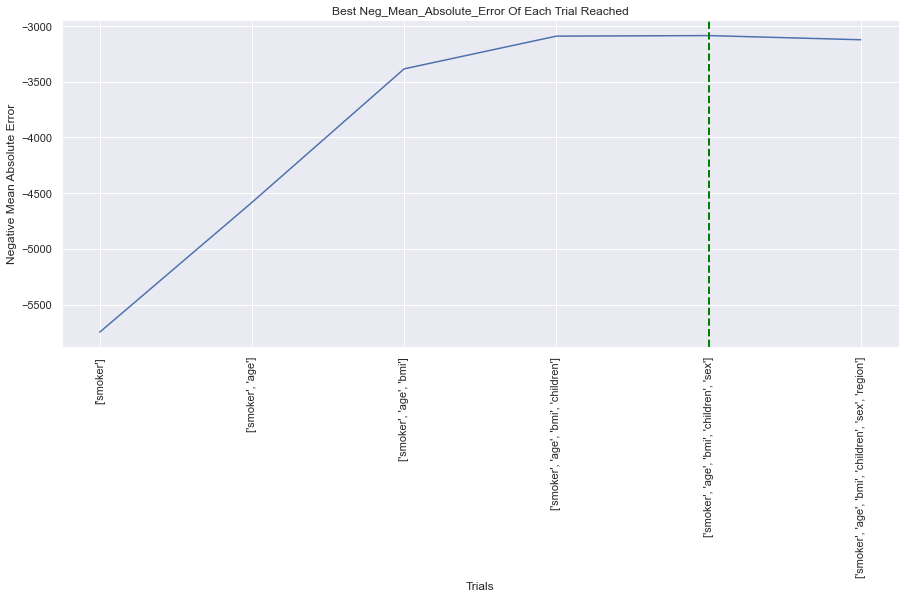

In [13]:
fsfs = ForwardStepwiseFeatureSelection()
fsfs.fit(X_train, y_train)
fsfs.search(estimators=clf, cv=3, scoring='accuracy', verbose=1, tolerance=3)

In [14]:
fsfs.best_com

{'Trial 1': ['smoker'],
 'Trial 2': ['smoker', 'age'],
 'Trial 3': ['smoker', 'age', 'bmi'],
 'Trial 4': ['smoker', 'age', 'bmi', 'children'],
 'Trial 5': ['smoker', 'age', 'bmi', 'children', 'sex'],
 'Trial 6': ['smoker', 'age', 'bmi', 'children', 'sex', 'region']}

In [15]:
fsfs.summary

,Best Subset,Best neg_mean_absolute_error,Time Spent
Trial 1,[smoker],-5746.2588,0.66
Trial 2,"[smoker, age]",-4582.2187,0.65
Trial 3,"[smoker, age, bmi]",-3384.1357,0.88
Trial 4,"[smoker, age, bmi, children]",-3090.5992,0.7
Trial 5,"[smoker, age, bmi, children, sex]",-3085.7086,0.48
Trial 6,"[smoker, age, bmi, children, sex, region]",-3122.9858,0.24


In [16]:
fsfs.trial_best

['smoker', 'age', 'bmi', 'children', 'sex']

In [17]:
fsfs.best_score

{'Trial 1': -5746.2588,
 'Trial 2': -4582.2187,
 'Trial 3': -3384.1357,
 'Trial 4': -3090.5992,
 'Trial 5': -3085.7086,
 'Trial 6': -3122.9858}